KNN Classification & Regression in Python <br>
Normalized Nerd <br>

https://youtu.be/0RwM2BaLNkE?si=2GhkShidzCnGkA4P

<h2>Generate classification data<h2>

In [1]:
import numpy as np 
from sklearn.utils import shuffle 
from sklearn.datasets._samples_generator import make_blobs

X_train, Y_train = make_blobs(n_samples=300, centers=2, n_features=2, cluster_std=6, random_state=11)

<h2>plot the data</h2>

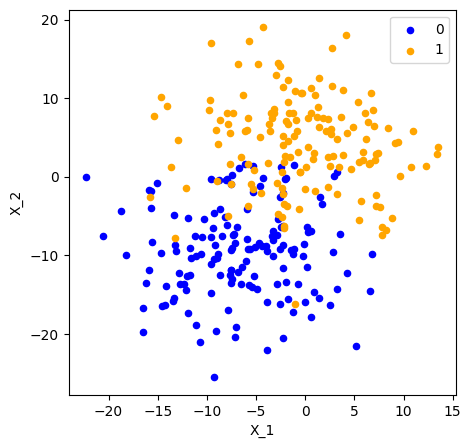

In [4]:
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure 
from pandas import DataFrame

df = DataFrame(dict( x = X_train[:, 0], y=X_train[:, 1], label=Y_train ))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(5,5))
grouped = df.groupby('label')

for key, group in grouped: 
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

<h2>Feature scaling</h2>

In [5]:
def normalize(X): 
    x1_min = min(X_train[:,0]) #take all rows of the array X, but only the elements in the 0th column
    x1_max = max(X_train[:,0])
    
    f = lambda x: (x - x1_min)/(x1_max - x1_min)
    X[:,0] = f(X[:,0]) #modifica directamente X para x1
    
    x2_min = min(X_train[:,1])
    x2_max = max(X_train[:,1])
    
    f = lambda x: (x - x2_min)/(x2_max - x2_min)
    X[:,1] = f(X[:,1]) #modifica directamente X para x2
    
    return X    

In [7]:
X = normalize(X_train)
print(X[0:5]) #take elements from index 0 up to (but not including) index 5

[[0.59987983 0.70438379]
 [0.22476575 0.2065585 ]
 [0.42582798 0.14400726]
 [0.60646637 0.58589566]
 [0.35477231 0.56762558]]


<h1>Heart of KNN<h1>

In [8]:
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)): 
        dist = np.sqrt( sum( np.square(X_tr[i] - new_point) ) )
        neighbor_arr.append( [i, dist] )
    neighbor_arr = sorted(neighbor_arr, key= lambda x : x[1])
    
    return neighbor_arr[0:k]